In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import xarray as xr
import h5py
from tqdm import tqdm
import time

In [2]:
from RPLB_acc_NoSTC import RPLB_acc_NoSTC
from RPLB_acc_NoSTCApril import RPLB_acc_NoSTCApril

In [24]:
c = 2.9979e8
lambda_0 = 1800e-9  # central wavelength
omega_0 = 2*np.pi*c/lambda_0

s = 57.5
tau_FWHM = np.sqrt(2)*s*np.sqrt(2**(2/(s+1))-1)/omega_0
tau_0 = s*np.sqrt(np.exp(2/(s+1))-1)/omega_0

half_angle = 0.1425  # np.pi/4
a = 2/(np.sin(half_angle)*np.tan(half_angle)*2*np.pi/lambda_0)  # set confocal parameter
w_0 = 2/(np.tan(half_angle)*2*np.pi/lambda_0)  # set beam waist

P = 100e12  # FL power
Psi_0 = 0.0
t_0 = -10*tau_0

time, temp, temp, KE_final = RPLB_acc_NoSTC(lambda_0, tau_0, w_0, P, Psi_0, 0.0, t_0, 0.0, 0.0)
time_April, temp, temp, KE_final_April = RPLB_acc_NoSTCApril(lambda_0, s, a, P, Psi_0, t_0, 0.0, 0.0)

print(KE_final[-1])
print(KE_final_April[-1])

23621096.531332996
33882587.150641285


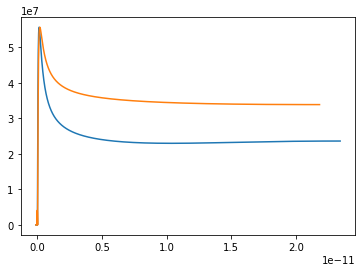

In [25]:
plt.plot(time, KE_final)
plt.plot(time_April, KE_final_April)

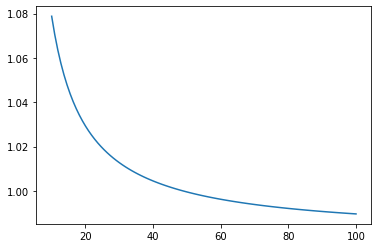

In [5]:
s = np.linspace(10, 100, 100)
tau_FWHM = np.sqrt(2)*s*np.sqrt(2**(2/(s+1))-1)/omega_0
tau_0 = s*np.sqrt(np.exp(2/(s+1))-1)/omega_0

half_angle = 0.1425
a = 2/(np.sin(half_angle)*np.tan(half_angle)*2*np.pi/lambda_0)  # set confocal parameter

ratio = np.zeros(len(s))

for i in range(0, len(s)):
    
    t_p = 2*1j*a/c
    t_m = 0.0
    f_zero_p = (1-1j*omega_0*t_p/s[i])**(-(s[i]+1))
    f_zero_m = 1
    f_one_p = (s[i]+1)*(1j*omega_0/s[i])*(1-1j*omega_0*t_p/s[i])**(-(s[i]+2))
    f_one_m = (s[i]+1)*(1j*omega_0/s[i])
    Gm_zero = f_zero_m - f_zero_p
    Gp_one = f_one_m + f_one_p
    field_April = np.abs((1/(1j*a)**2)*(Gm_zero/(1j*a)+Gp_one/c))*((a)**(1))*(s[i])**(0)*(omega_0)**(-1)*c

    z_R = (np.sqrt(1+(a*2*np.pi/lambda_0)**2)-1)/(2*np.pi/lambda_0)
    field_old = 1/(z_R)

    ratio[i] = field_April/field_old
    
plt.plot(s, ratio)

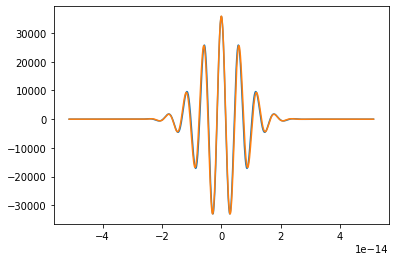

In [6]:
s = 57.5
tau_FWHM = np.sqrt(2)*s*np.sqrt(2**(2/(s+1))-1)/omega_0
tau_0 = s*np.sqrt(np.exp(2/(s+1))-1)/omega_0

half_angle = 0.1425
a = 2/(np.sin(half_angle)*np.tan(half_angle)*2*np.pi/lambda_0)  # set confocal parameter
w_0 = 2/(np.tan(half_angle)*2*np.pi/lambda_0)  # set beam waist
z_R = (np.sqrt(1+(a*2*np.pi/lambda_0)**2)-1)/(2*np.pi/lambda_0)

time = np.linspace(-5*tau_0, 5*tau_0, 1000)
z = 0

t_p = time + z/c +2*1j*a/c
t_m = time - z/c
f_zero_p = (1-1j*omega_0*t_p/s)**(-(s+1))
f_zero_m = (1-1j*omega_0*t_m/s)**(-(s+1))
f_one_p = (s+1)*(1j*omega_0/s)*(1-1j*omega_0*t_p/s)**(-(s+2))
f_one_m = (s+1)*(1j*omega_0/s)*(1-1j*omega_0*t_m/s)**(-(s+2))
Gm_zero = f_zero_m - f_zero_p
Gp_one = f_one_m + f_one_p
field_total = np.real(np.exp(1j*np.pi/2)*(1/(z+1j*a)**2)*(Gm_zero/(z+1j*a)+Gp_one/c))*a*c/omega_0

field_temp = np.cos(0.0+2*np.arctan(z/z_R)+omega_0*time-omega_0*z/c)/(z_R*(1+(z/z_R)**2))
env_temp = np.exp(-((time-z/c)/tau_0)**2)
field_old = field_temp*env_temp

plt.plot(time, field_total)
plt.plot(time, field_old)